## 05 - Problema Inverso

La inversión del perfil de temperaturas en un *borehole*, es una operación que transforma un perfil temperatura vs. profundidad en un tiempo determinado, a un perfil de temperatura vs. tiempo en una profundidad específica (la superficie). Y se hará a través del método llamado Descomposición en Valores Singulares (*Singular Value Decomposition*, SVD).

Problema directo:

$\Theta_j = T_k \thinspace A_{jk}$

Problema inverso con SVD:

$T_k =  A_{jk}^{-1} \Theta_j  = \mathbf{V}\thinspace\mathbf{\Lambda_p}^{-1}\thinspace\mathbf{U_p}^T\Theta_j$

In [2]:
# Importar las librerías necesarias
# ======================================================================================================================================================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# Determinar el estilo de las gráficas
sns.set_theme(style="whitegrid")

### 05.1 - ala1110-2

In [3]:
# Leer la matriz y datos necesarios
# ======================================================================================================================================================
nombre = "ala1110-2"
tk=(0,510,20)
Ail = pd.read_csv(f"../resultados/matriz_{nombre}.csv")

In [4]:
U,sigma,Vt = np.linalg.svd(Ail)

V = np.transpose(Vt)
Ut = np.transpose(U)

sigma_red = sigma[:3] #Como dice en el paper

Ut_red1 = Ut[0:len(sigma_red)]
U_red= np.transpose(Ut_red1)
Vt_red1 = Vt[0:len(sigma_red)]
V_red = np.transpose(Vt_red1) 

diagonal_sigma_red_inv= np.diag(1/np.array(sigma_red))

Tt = pd.read_csv(f"..//resultados//anomalias_{nombre}.csv",delimiter=",",decimal=".")
Tt = Tt.transpose()
Tt = list(Tt[0])

# Quito los datos de los primeros 40 metros
#Tt=Tt[2:]

mest = V_red @ (Ut_red1 @ Tt @ diagonal_sigma_red_inv)
np.savetxt(f"../resultados/mest_{nombre}.csv",mest,delimiter=",")

#### 05.1.1 - Comprobación de resultados por OLS

In [5]:
# Problema directo
theta_j = (Ail@mest)
theta_j_real = Tt

Text(-0.05, -0.2, 'R2 del problema:0.96')

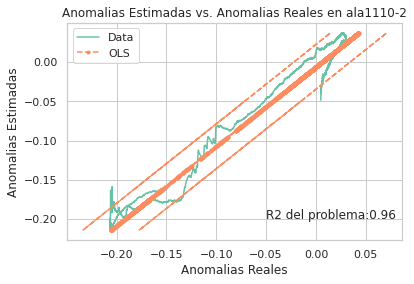

In [6]:
# Regresión lineal OLS, grafico y cálculos
y = sm.add_constant(theta_j_real)
x = theta_j

model = sm.OLS(x,y)
results = model.fit()

pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

plt.plot(theta_j,theta_j_real,label = "Data",c=sns.color_palette('Set2')[0])
plt.plot(results.fittedvalues, theta_j_real, "r--.", label="OLS",color=sns.color_palette('Set2')[1])
plt.plot(iv_u, theta_j_real, "r--",color=sns.color_palette('Set2')[1])
plt.plot(iv_l, theta_j_real, "r--",color=sns.color_palette('Set2')[1])
plt.legend(loc="best")

plt.title("Anomalias Estimadas vs. Anomalias Reales en ala1110-2")

plt.xlabel("Anomalias Reales")
plt.ylabel("Anomalias Estimadas")
plt.text(x=-0.05,y=-0.20,s=f"R2 del problema:{round(results.rsquared,2)}")

### 05.2 - 1501

In [7]:
# Leer la matriz y datos necesarios
# ======================================================================================================================================================
nombre = "1501"
tk=(0,510,20)
Ail = pd.read_csv(f"../resultados/matriz_{nombre}.csv")
Ail.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.464922,0.140423,0.067747,0.041733,0.028987,0.021636,0.016943,0.013734,0.011424,0.009697,...,0.004699,0.004282,0.003924,0.003613,0.003341,0.003101,0.002889,0.002700,0.002531,0.002379
1,0.329880,0.160960,0.082905,0.052387,0.036889,0.027771,0.021877,0.017810,0.014863,0.012649,...,0.006182,0.005638,0.005170,0.004763,0.004407,0.004094,0.003815,0.003567,0.003345,0.003145
2,0.223245,0.165874,0.092825,0.060600,0.043430,0.033059,0.026241,0.021481,0.018003,0.015372,...,0.007595,0.006935,0.006365,0.005869,0.005434,0.005051,0.004710,0.004406,0.004134,0.003888
3,0.143869,0.157520,0.097383,0.066150,0.048437,0.037371,0.029940,0.024676,0.020788,0.017822,...,0.008924,0.008158,0.007497,0.006919,0.006413,0.005965,0.005567,0.005211,0.004892,0.004604
4,0.088172,0.139760,0.096961,0.069010,0.051827,0.040628,0.032909,0.027340,0.023174,0.019963,...,0.010155,0.009298,0.008555,0.007906,0.007335,0.006829,0.006379,0.005977,0.005614,0.005288


In [8]:
# Problema Inverso
U,sigma,Vt = np.linalg.svd(Ail)

V = np.transpose(Vt)
Ut = np.transpose(U)

sigma_red = sigma[:3] #Como dice en el paper

Ut_red1 = Ut[0:len(sigma_red)]
U_red= np.transpose(Ut_red1)
Vt_red1 = Vt[0:len(sigma_red)]
V_red = np.transpose(Vt_red1) 

diagonal_sigma_red_inv= np.diag(1/np.array(sigma_red))

Tt = pd.read_csv(f"..//resultados//anomalias_{nombre}.csv",delimiter=",",decimal=".")
Tt = Tt.transpose()
Tt = list(Tt[0])


mest = V_red @ (Ut_red1 @ Tt @ diagonal_sigma_red_inv)
np.savetxt("../resultados/mest.csv",mest,delimiter=",")

Text(0.4, -0.1, 'R2 del problema:0.91')

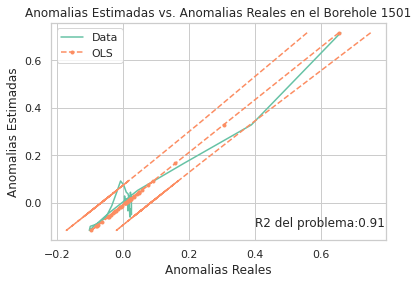

In [9]:
# Problema directo, calculo de la regresión OLS
theta_j = (Ail@mest)
theta_j_real = Tt

y = sm.add_constant(theta_j_real)
x = theta_j

model = sm.OLS(x,y)
results = model.fit()

pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

plt.plot(theta_j,theta_j_real,label = "Data",c=sns.color_palette('Set2')[0])
plt.plot(results.fittedvalues, theta_j_real, "r--.", label="OLS",color=sns.color_palette('Set2')[1])
plt.plot(iv_u, theta_j_real, "r--",color=sns.color_palette('Set2')[1])
plt.plot(iv_l, theta_j_real, "r--",color=sns.color_palette('Set2')[1])
plt.legend(loc="best")

plt.title(f"Anomalias Estimadas vs. Anomalias Reales en el Borehole {nombre}")

plt.xlabel("Anomalias Reales")
plt.ylabel("Anomalias Estimadas")
plt.text(x=0.4,y=-0.10,s=f"R2 del problema:{round(results.rsquared,2)}")

### 05.3 - 1504

In [10]:
# Leer la matriz y datos necesarios
# ======================================================================================================================================================
nombre = "1504"
tk=(0,510,20)
Ail = pd.read_csv(f"../resultados/matriz_{nombre}.csv")
Ail.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.469501,0.139539,0.067205,0.041372,0.028726,0.021436,0.016784,0.013603,0.011314,0.009603,...,0.004652,0.004240,0.003885,0.003577,0.003308,0.003071,0.002860,0.002673,0.002506,0.002355
1,0.228016,0.165972,0.092448,0.060243,0.043131,0.032811,0.026033,0.021304,0.017851,0.015239,...,0.007525,0.006870,0.006305,0.005814,0.005383,0.005003,0.004665,0.004364,0.004094,0.003851
2,0.053759,0.118856,0.092845,0.069392,0.053520,0.042665,0.034960,0.029290,0.024986,0.021634,...,0.011190,0.010262,0.009455,0.008749,0.008126,0.007574,0.007081,0.006639,0.006242,0.005883
3,0.030016,0.094931,0.085339,0.067663,0.053899,0.043851,0.036439,0.030844,0.026518,0.023102,...,0.012193,0.011204,0.010341,0.009583,0.008913,0.008317,0.007785,0.007307,0.006876,0.006486
4,0.015910,0.072319,0.075701,0.064086,0.052920,0.044044,0.037177,0.031831,0.027607,0.024217,...,0.013073,0.012038,0.011132,0.010334,0.009626,0.008996,0.008431,0.007922,0.007463,0.007046


In [11]:
# Problema Inverso
U,sigma,Vt = np.linalg.svd(Ail)

V = np.transpose(Vt)
Ut = np.transpose(U)

sigma_red = sigma[:3] #Como dice en el paper
Ut_red1 = Ut[0:len(sigma_red)]
U_red= np.transpose(Ut_red1)
Vt_red1 = Vt[0:len(sigma_red)]
V_red = np.transpose(Vt_red1) 

diagonal_sigma_red_inv= np.diag(1/np.array(sigma_red))

Tt = pd.read_csv(f"..//resultados//anomalias_{nombre}.csv",delimiter=",",decimal=".")
Tt = Tt.transpose()
Tt = list(Tt[0])

mest = V_red @ (Ut_red1 @ Tt @ diagonal_sigma_red_inv)
np.savetxt(f"../resultados/mest_{nombre}.csv",mest,delimiter=",")

Text(0.6, -0.1, 'R2 del problema:0.95')

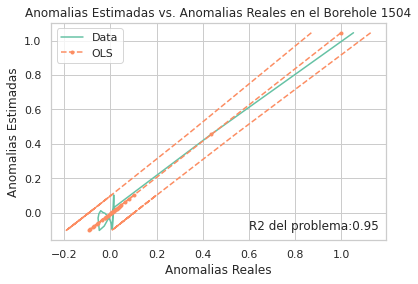

In [12]:
# Problema directo y regresión OLS
theta_j = (Ail@mest)
theta_j_real = Tt

y = sm.add_constant(theta_j_real)
x = theta_j

model = sm.OLS(x,y)
results = model.fit()

pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

plt.plot(theta_j,theta_j_real,label = "Data",c=sns.color_palette('Set2')[0])
plt.plot(results.fittedvalues, theta_j_real, "r--.", label="OLS",color=sns.color_palette('Set2')[1])
plt.plot(iv_u, theta_j_real, "r--",color=sns.color_palette('Set2')[1])
plt.plot(iv_l, theta_j_real, "r--",color=sns.color_palette('Set2')[1])
plt.legend(loc="best")

plt.title(f"Anomalias Estimadas vs. Anomalias Reales en el Borehole {nombre}")

plt.xlabel("Anomalias Reales")
plt.ylabel("Anomalias Estimadas")
plt.text(x=0.6,y=-0.10,s=f"R2 del problema:{round(results.rsquared,2)}")

### 05.4 - 1505

In [13]:
# Leer la matriz y datos necesarios
# ======================================================================================================================================================
nombre = "1505"
tk=(0,510,20)
Ail = pd.read_csv(f"../resultados/matriz_{nombre}.csv")
Ail.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.469501,0.139539,0.067205,0.041372,0.028726,0.021436,0.016784,0.013603,0.011314,0.009603,...,0.004652,0.004240,0.003885,0.003577,0.003308,0.003071,0.002860,0.002673,0.002506,0.002355
1,0.334851,0.160435,0.082385,0.051997,0.036591,0.027536,0.021686,0.017650,0.014728,0.012532,...,0.006122,0.005584,0.005120,0.004717,0.004364,0.004054,0.003778,0.003532,0.003312,0.003114
2,0.228016,0.165972,0.092448,0.060243,0.043131,0.032811,0.026033,0.021304,0.017851,0.015239,...,0.007525,0.006870,0.006305,0.005814,0.005383,0.005003,0.004665,0.004364,0.004094,0.003851
3,0.148014,0.158347,0.097253,0.065887,0.048175,0.037136,0.029734,0.024494,0.020628,0.017680,...,0.008845,0.008086,0.007429,0.006857,0.006354,0.005910,0.005516,0.005163,0.004847,0.004561
4,0.091473,0.141252,0.097142,0.068892,0.051638,0.040431,0.032722,0.027168,0.023017,0.019821,...,0.010070,0.009220,0.008482,0.007838,0.007271,0.006769,0.006323,0.005923,0.005564,0.005240


In [14]:
# Problema Inverso
U,sigma,Vt = np.linalg.svd(Ail)

V = np.transpose(Vt)
Ut = np.transpose(U)

sigma_red = sigma[:3] #Como dice en el paper
Ut_red1 = Ut[0:len(sigma_red)]
U_red= np.transpose(Ut_red1)
Vt_red1 = Vt[0:len(sigma_red)]
V_red = np.transpose(Vt_red1) 

diagonal_sigma_red_inv= np.diag(1/np.array(sigma_red))

Tt = pd.read_csv(f"..//resultados//anomalias_{nombre}.csv",delimiter=",",decimal=".")
Tt = Tt.transpose()
Tt = list(Tt[0])

# Quito los datos de los primeros 40 metros
#Tt=Tt[2:]

mest = V_red @ (Ut_red1 @ Tt @ diagonal_sigma_red_inv)
np.savetxt(f"../resultados/mest_{nombre}.csv",mest,delimiter=",")

Text(0.8, 0.1, 'R2 del problema:0.99')

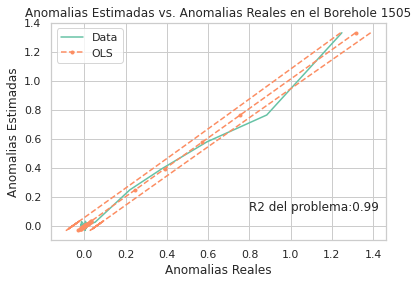

In [15]:
# Problema directo y regresión OLS

theta_j = (Ail@mest)
theta_j_real = Tt

y = sm.add_constant(theta_j_real)
x = theta_j

model = sm.OLS(x,y)
results = model.fit()

pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

plt.plot(theta_j,theta_j_real,label = "Data",c=sns.color_palette('Set2')[0])
plt.plot(results.fittedvalues, theta_j_real, "r--.", label="OLS",color=sns.color_palette('Set2')[1])
plt.plot(iv_u, theta_j_real, "r--",color=sns.color_palette('Set2')[1])
plt.plot(iv_l, theta_j_real, "r--",color=sns.color_palette('Set2')[1])
plt.legend(loc="best")

plt.title(f"Anomalias Estimadas vs. Anomalias Reales en el Borehole {nombre}")

plt.xlabel("Anomalias Reales")
plt.ylabel("Anomalias Estimadas")
plt.text(x=0.8,y=0.10,s=f"R2 del problema:{round(results.rsquared,2)}")

### 05.5 - DDH2457

In [16]:
# Leer la matriz y datos necesarios
# ======================================================================================================================================================
nombre = "DDH2457"
tk=(0,510,20)
Ail = pd.read_csv(f"../resultados/matriz_{nombre}.csv")
Ail.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.273151,0.165264,0.088527,0.056806,0.040334,0.030523,0.024131,0.019696,0.016470,0.014038,...,0.006896,0.006293,0.005773,0.005321,0.004925,0.004576,0.004266,0.003990,0.003742,0.003519
1,0.270329,0.165387,0.088789,0.057024,0.040508,0.030663,0.024247,0.019793,0.016554,0.014110,...,0.006934,0.006327,0.005805,0.005350,0.004952,0.004601,0.004290,0.004012,0.003763,0.003538
2,0.267528,0.165500,0.089047,0.057240,0.040680,0.030803,0.024363,0.019891,0.016637,0.014183,...,0.006971,0.006362,0.005837,0.005380,0.004979,0.004627,0.004313,0.004034,0.003784,0.003558
3,0.264867,0.165598,0.089290,0.057444,0.040844,0.030936,0.024473,0.019983,0.016716,0.014251,...,0.007007,0.006395,0.005867,0.005408,0.005005,0.004651,0.004336,0.004055,0.003804,0.003577
4,0.262104,0.165690,0.089541,0.057656,0.041014,0.031074,0.024587,0.020080,0.016799,0.014323,...,0.007044,0.006429,0.005898,0.005437,0.005033,0.004676,0.004360,0.004078,0.003825,0.003597


In [17]:
# Problema Inverso
U,sigma,Vt = np.linalg.svd(Ail)

V = np.transpose(Vt)
Ut = np.transpose(U)

sigma_red = sigma[:3] #Como dice en el paper
Ut_red1 = Ut[0:len(sigma_red)]
U_red= np.transpose(Ut_red1)
Vt_red1 = Vt[0:len(sigma_red)]
V_red = np.transpose(Vt_red1) 

diagonal_sigma_red_inv= np.diag(1/np.array(sigma_red))

Tt = pd.read_csv(f"..//resultados//anomalias_{nombre}.csv",delimiter=",",decimal=".")
Tt = Tt.transpose()
Tt = list(Tt[0])

# Quito los datos de los primeros 40 metros
#Tt=Tt[2:]

mest = V_red @ (Ut_red1 @ Tt @ diagonal_sigma_red_inv)
np.savetxt(f"../resultados/mest_{nombre}.csv",mest,delimiter=",")

Text(-0.02, -0.14, 'R2 del problema:0.82')

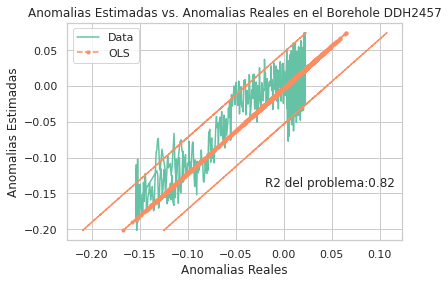

In [18]:
# Problema directo y regresión OLS
theta_j = (Ail@mest)
theta_j_real = Tt

y = sm.add_constant(theta_j_real)
x = theta_j

model = sm.OLS(x,y)
results = model.fit()

pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

plt.plot(theta_j,theta_j_real,label = "Data",c=sns.color_palette('Set2')[0])
plt.plot(results.fittedvalues, theta_j_real, "r--.", label="OLS",color=sns.color_palette('Set2')[1])
plt.plot(iv_u, theta_j_real, "r--",color=sns.color_palette('Set2')[1])
plt.plot(iv_l, theta_j_real, "r--",color=sns.color_palette('Set2')[1])
plt.legend(loc="best")

plt.title(f"Anomalias Estimadas vs. Anomalias Reales en el Borehole {nombre}")

plt.xlabel("Anomalias Reales")
plt.ylabel("Anomalias Estimadas")
plt.text(x=-0.02,y=-0.14,s=f"R2 del problema:{round(results.rsquared,2)}")